In [165]:
import json
import sys
import os

# parent_dir = os.path.abspath(os.getcwd())
# vendor_dir = os.path.join(parent_dir, 'vendor')
# sys.path.append(vendor_dir)

# from tripadvisorCrawler.items import ReviewItem

from items import *
from dataframe import *
    
import matplotlib.pyplot as plt
import numpy as np

with open('data/review_items.jl', 'r') as f:
    raw = f.read()

reviews = as_dataframe(raw)

with open('data/hotel_items.jl','r') as f:
    raw = f.read()

hotels = as_dataframe(raw)

In [166]:
## show case hotels
hotels.head(3)

,batch_id,description,item_id,item_title,site_name,url
0,20160916001425,"The Marker Hotel, Dublin: See 2,006 traveller ...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nThe Marker Hotel\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
1,20160916001425,"Aberdeen Lodge, Dublin: See 448 traveller revi...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAberdeen Lodge\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
2,20160916001425,"The Merrion Hotel, Dublin: See 2,567 traveller...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nThe Merrion Hotel\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...


In [167]:
# number of hotels
hotels.shape[0]

157

In [168]:
# show case reviews
reviews.head(3)

,batch_id,item_id,rating,rating_date,rating_percentage,review_id,review_text,review_title,site_name,url,user_id
0,20160916001425,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,2016-09-12T00:00:00,1.0,review_417767437,\nMy friend and I stayed here for some of our ...,“Excellent service. Beautiful hotel. Perfect l...,TripAdvisor,https://www.tripadvisor.ie//ShowUserReviews-g1...,45A1AF044DD8B0A63BFEAC62D2C28D45
1,20160916001425,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,2016-09-13T00:00:00,1.0,review_417825804,\nMy fiancé and I read wonderful things about ...,“Exceptional experience at The Marker Hotel!”,TripAdvisor,https://www.tripadvisor.ie//ShowUserReviews-g1...,256DDB53EC302B9E6144B947E60108A6
2,20160916001425,https://www.tripadvisor.ie/Hotel_Review-g18660...,3,2016-09-11T00:00:00,0.5,review_417245860,\nOn arrival we were welcomed by friendly staf...,“Terrific hotel”,TripAdvisor,https://www.tripadvisor.ie//ShowUserReviews-g1...,1BDEA852CE25E75A48852A9FCE638636


In [169]:
#summary of rating of dublin hotels
reviews.ix[:,['rating']].describe()

,rating
count,132084.000000
mean,4.102253
std,1.073853
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


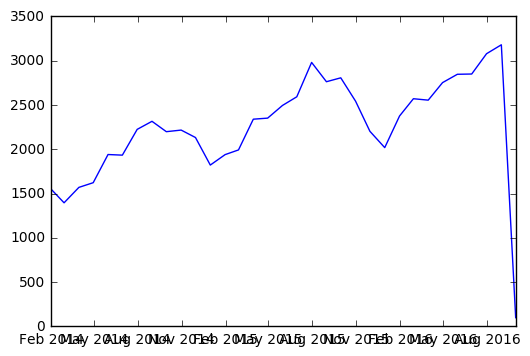

In [192]:
reviews['rating_date'] = pd.to_datetime(reviews['rating_date'], format='%Y-%m-%dT%H:%M:%S')
timeseries = reviews.set_index('rating_date')
ts = timeseries['2014-01-01':'2016-09-01'].ix[:,'rating'].resample('M').count()
%matplotlib inline
x = ts.index
y = ts.values
plt.plot(x,y)

# print(timeseries['2014-01-01':'2016-09-01'].ix[:,'rating'].resample('M').count())

In [170]:
reviewByHotels = reviews.groupby('item_id')

In [176]:
import pandas as pd
for hotel_url, group in reviewByHotels:
    subset = group.ix[:,['rating_date', 'rating']]
    summary = subset.ix[:,'rating'].describe()
#     print(summary)
    subset['rating_date'] = pd.to_datetime(subset['rating_date'], format='%Y-%m-%dT%H:%M:%S')
    subset.set_index('rating_date',inplace=True)
    ## Do my own thing: input is subset of rating with timestamp index. output is bin
    ## count for last 2 years of rating on a weekly span.
    
    
    
    
    
#     print(subset.resample('AS').count()) # annual start
#     last2years = pd.date_range('2014-01-01','2016-09-01')
#     last2years = pd.period_range('2014','2016')
#     print(last2years)
#     weeklyCount = subset['2014-01-01':'2016-09-01'].resample('AS').count()
    print(subset['2014-01-01':'2016-09-01'].resample('AS').count())
#     print(weeklyCount)
#     print(subset["2014-01-01":"2016-09-01"])
        


             rating
rating_date        
2016-01-01       22
             rating
rating_date        
2014-01-01        1
2015-01-01        1
             rating
rating_date        
2014-01-01      195
2015-01-01      204
2016-01-01        6
             rating
rating_date        
2015-01-01        1
             rating
rating_date        
2014-01-01       40
2015-01-01       34
2016-01-01       38
             rating
rating_date        
2014-01-01      684
2015-01-01      868
2016-01-01      605
             rating
rating_date        
2014-01-01      151
2015-01-01      182
2016-01-01      143
             rating
rating_date        
2014-01-01      198
2015-01-01      309
2016-01-01      228
             rating
rating_date        
2014-01-01      670
2015-01-01      619
2016-01-01      518
             rating
rating_date        
2014-01-01      533
2015-01-01      651
2016-01-01      431
             rating
rating_date        
2014-01-01       56
2015-01-01       92
2016-01-01       58
